#### Подготовка данных

Преобразование изображений в массив
Создание пар изображений для обучения

In [1]:
import os
from random import randint
import numpy as np

from numpy import asarray
from IPython import display
from PIL import Image

from config import DATA_DIR, IMAGES_DIR, IMAGE_SIZE

Создание списка пар директорий и имен изображений

In [2]:
path_file_pairs = []

for dirpath, dirnames, filenames in os.walk(IMAGES_DIR):
    for filename in filenames:
        path_file_pairs.append([dirpath, filename])


In [3]:
len(path_file_pairs)

400

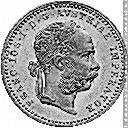

In [4]:
display.Image(f'{path_file_pairs[0][0]}\\{path_file_pairs[0][1]}')

Функция преобразования изображения в массив

In [5]:
def read_image(filename):
    img = Image.open(filename)
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE), resample=0)
    img = asarray(img)
    img = img / 255.
    return img

Генерируем массивы пар изображений

1800 одинаковых пар монет и 1800 разных

In [6]:
pair_list = []
labels = []

folders = 40
files = 10

for i in range(len(path_file_pairs)):
    for j in range(i + 1, len(path_file_pairs)):
        img_1_path, img_2_path = path_file_pairs[i][0], path_file_pairs[j][0]
        img_1_name, img_2_name = path_file_pairs[i][1], path_file_pairs[j][1]

        if img_1_path == img_2_path:
            img_1 = f'{img_1_path}\\{img_1_name}'
            img_2 = f'{img_2_path}\\{img_2_name}'
            new_row = [read_image(img_1), read_image(img_2)]
            pair_list.append(new_row)
            labels.append(1)

for i in range(len(pair_list)):
    k = randint(0, len(path_file_pairs) - 1)
    m = k
    while k == m:
        m = randint(0, len(path_file_pairs) - 1)
    img_1_path, img_2_path = path_file_pairs[k][0], path_file_pairs[m][0]
    img_1_name, img_2_name = path_file_pairs[k][1], path_file_pairs[m][1]
    img_1 = f'{img_1_path}\\{img_1_name}'
    img_2 = f'{img_2_path}\\{img_2_name}'
    new_row = [read_image(img_1), read_image(img_2)]
    pair_list.append(new_row)
    labels.append(0)

pairs = np.array(pair_list)
labels = np.array(labels)

In [7]:
pairs.shape

(3600, 2, 128, 128)

In [8]:
labels.shape

(3600,)

Сохраняем массивы для дальнейшего использования

In [10]:
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

np.save(f'{DATA_DIR}/pairs', pairs)
np.save(f'{DATA_DIR}/labels', labels)